In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import re

In [344]:
# Reading the data
airports_lookup = pd.read_csv(r"C:\Users\Dotan\Desktop\Data Tapas\airports-lookup.csv", delimiter=',')
airlines_lookup = pd.read_csv(r"C:\Users\Dotan\Desktop\Data Tapas\airlines_lookup.csv", delimiter=',')
flights_data = pd.read_csv(r"C:\Users\Dotan\Desktop\Data Tapas\flights_data.csv", delimiter=',', low_memory=False, parse_dates = ["Date","Scheduled Departure time","Actual Departure Time","Scheduled Arrival Time","Actual Arrival Time"])

In [110]:
pd.set_option('display.max_columns', None)

In [342]:
airports_lookup.head()

,Code,Description
0,10001,"Afognak Lake, AK: Afognak Lake Airport"
1,10003,"Granite Mountain, AK: Bear Creek Mining Strip"
2,10004,"Lik, AK: Lik Mining Camp"
3,10005,"Little Squaw, AK: Little Squaw Airport"
4,10006,"Kizhuyak, AK: Kizhuyak Bay"


In [345]:
flights_data

,Year,Date,day,Airline ID,Origin Airport ID,Destination Airport ID,Scheduled Departure time,Actual Departure Time,Unnamed: 8,Departure delayed,Scheduled Arrival Time,Actual Arrival Time,Arrival delayed,Cancelled,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay,Unnamed: 19
0,2013,2013-03-02,2,19790,11292,12478,0050,0039,=LEFT(G2),1.0,0632,0626,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,2013-03-26,26,20409,11292,12478,0050,0041,NaN,1.0,0625,0620,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,2013-03-30,30,20409,11292,12478,0050,0042,NaN,1.0,0625,0615,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,2013-03-22,22,20409,11292,12478,0050,0043,NaN,1.0,0625,0617,1.0,0,NaN,NaN,NaN,NaN,NaN,643.0
4,2013,2013-03-02,2,20409,11292,12478,0050,0044,NaN,1.0,0625,0622,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48813,2013,2013-03-30,30,20409,12889,12478,2359,2358,NaN,1.0,0744,0739,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
48814,2013,2013-03-31,31,20409,12478,10732,2359,2358,NaN,1.0,0339,0332,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
48815,2013,2013-03-25,25,20409,12889,12478,2359,2358,NaN,1.0,0744,0739,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
48816,2013,2013-03-13,13,20409,12889,12478,2359,2359,NaN,0.0,0744,0752,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [346]:
# Removing irrelevant columns
flights_data.drop('Unnamed: 8', axis = 1, inplace=True)
flights_data.drop('Unnamed: 19', axis = 1, inplace=True)

In [61]:
flights_data.head()

,Year,Date,day,Airline ID,Origin Airport ID,Destination Airport ID,Scheduled Departure time,Actual Departure Time,Departure delayed,Scheduled Arrival Time,Actual Arrival Time,Arrival delayed,Cancelled,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay
0,2013,2013-03-02,2,19790,11292,12478,0050,0039,1.0,0632,0626,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2013,2013-03-26,26,20409,11292,12478,0050,0041,1.0,0625,0620,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2013,2013-03-30,30,20409,11292,12478,0050,0042,1.0,0625,0615,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2013,2013-03-22,22,20409,11292,12478,0050,0043,1.0,0625,0617,1.0,0,NaN,NaN,NaN,NaN,NaN
4,2013,2013-03-02,2,20409,11292,12478,0050,0044,1.0,0625,0622,1.0,0,NaN,NaN,NaN,NaN,NaN


In [347]:
# Merging flights_data and airports_lookup tables into one table (adding Airport names)
flights_total = flights_data.merge(airports_lookup, how='inner', left_on="Origin Airport ID", right_on="Code")

In [348]:
flights_total.drop('Code', axis = 1, inplace=True)

In [349]:
flights_total = flights_total.rename(columns={'Description':'Origin Airport Name'})
flights_total.head()

,Year,Date,day,Airline ID,Origin Airport ID,Destination Airport ID,Scheduled Departure time,Actual Departure Time,Departure delayed,Scheduled Arrival Time,Actual Arrival Time,Arrival delayed,Cancelled,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay,Origin Airport Name
0,2013,2013-03-02,2,19790,11292,12478,0050,0039,1.0,0632,0626,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International"
1,2013,2013-03-26,26,20409,11292,12478,0050,0041,1.0,0625,0620,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International"
2,2013,2013-03-30,30,20409,11292,12478,0050,0042,1.0,0625,0615,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International"
3,2013,2013-03-22,22,20409,11292,12478,0050,0043,1.0,0625,0617,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International"
4,2013,2013-03-02,2,20409,11292,12478,0050,0044,1.0,0625,0622,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International"


In [350]:
flights_total = flights_total.merge(airports_lookup, how='inner', left_on="Destination Airport ID", right_on="Code")

In [351]:
flights_total.drop('Code', axis = 1, inplace=True)

In [353]:
flights_total = flights_total.rename(columns={'Description':'Destination Airport Name'})
flights_total.head()

,Year,Date,day,Airline ID,Origin Airport ID,Destination Airport ID,Scheduled Departure time,Actual Departure Time,Departure delayed,Scheduled Arrival Time,Actual Arrival Time,Arrival delayed,Cancelled,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay,Origin Airport Name,Destination Airport Name
0,2013,2013-03-02,2,19790,11292,12478,0050,0039,1.0,0632,0626,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International"
1,2013,2013-03-26,26,20409,11292,12478,0050,0041,1.0,0625,0620,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International"
2,2013,2013-03-30,30,20409,11292,12478,0050,0042,1.0,0625,0615,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International"
3,2013,2013-03-22,22,20409,11292,12478,0050,0043,1.0,0625,0617,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International"
4,2013,2013-03-02,2,20409,11292,12478,0050,0044,1.0,0625,0622,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International"


In [354]:
# Adding Airline names into the table
flights_total = flights_total.merge(airlines_lookup, how='inner', left_on="Airline ID", right_on="Code")

In [355]:
flights_total.drop('Code', axis = 1, inplace=True)

In [356]:
flights_total = flights_total.rename(columns={'Description':'Airline Name'})
flights_total.head()

,Year,Date,day,Airline ID,Origin Airport ID,Destination Airport ID,Scheduled Departure time,Actual Departure Time,Departure delayed,Scheduled Arrival Time,Actual Arrival Time,Arrival delayed,Cancelled,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay,Origin Airport Name,Destination Airport Name,Airline Name
0,2013,2013-03-02,2,19790,11292,12478,0050,0039,1.0,0632,0626,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines Inc.: DL
1,2013,2013-03-19,19,19790,11292,12478,0845,NaN,NaN,1429,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines Inc.: DL
2,2013,2013-03-25,25,19790,11292,12478,0845,NaN,NaN,1429,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines Inc.: DL
3,2013,2013-03-06,6,19790,11292,12478,0845,0839,1.0,1429,1432,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines Inc.: DL
4,2013,2013-03-29,29,19790,11292,12478,0845,0840,1.0,1429,1409,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines Inc.: DL


In [1187]:
flights_year = flights_total.groupby('Airline Name').agg({'Airline ID':'count'}).rename(columns={'Airline ID':'Count'}).sort_values('Count', ascending = False)
flights_year

,Count
Airline Name,
JetBlue Airways,9811
Delta Air Lines,8424
American Airlines,4983
American Eagle Airlines,4874
Pinnacle Airlines,4488
Southwest Airlines,4026
ExpressJet Airlines,3690
US Airways,3229
United Air Lines,2282


In [1176]:
# A function to rename the Airline names, shorten them.
def airlines(string):
    output = string
    if output.startswith('AirTran') == True:
        output = 'AirTran Airways'
        return output
    elif output.startswith('American Airlines') == True:
        output = 'American Airlines'
        return output
    elif output.startswith('American Eagle') == True:
        output = 'American Eagle Airlines'
        return output
    elif output.startswith('Delta') == True:
        output = 'Delta Air Lines'
        return output
    elif output.startswith('ExpressJet') == True:
        output = 'ExpressJet Airlines'
        return output
    elif output.startswith('Frontier') == True:
        output = 'Frontier Airlines'
        return output
    elif output.startswith('Hawaiian') == True:
        output = 'Hawaiian Airlines'
        return output
    elif output.startswith('JetBlue') == True:
        output = 'JetBlue Airways'
        return output
    elif output.startswith('Mesa') == True:
        output = 'Mesa Airlines'
        return output
    elif output.startswith('Pinnacle') == True:
        output = 'Pinnacle Airlines'
        return output
    elif output.startswith('SkyWest') == True:
        output = 'SkyWest Airlines'
        return output
    elif output.startswith('Southwest') == True:
        output = 'Southwest Airlines'
        return output
    elif output.startswith('US Airways') == True:
        output = 'US Airways'
        return output
    elif output.startswith('United') == True:
        output = 'United Air Lines'
        return output
    elif output.startswith('Virgin') == True:
        output = 'Virgin America'
        return output
    else:
        return output

In [1177]:
flights_total['Airline Name'] = flights_total['Airline Name'].apply(airlines)

In [1189]:
flights_year = flights_year.reset_index()

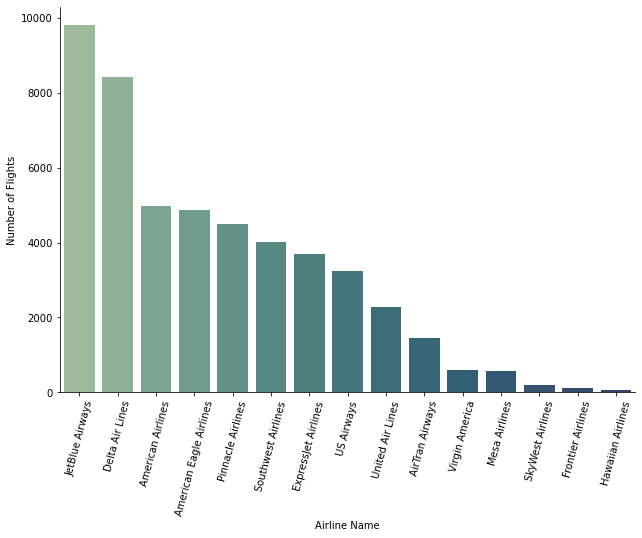

In [1198]:
g = sns.catplot(x="Airline Name", y="Count",
                data=flights_year, saturation=.6,
                kind="bar", aspect=.7, palette='crest')
(g.set_axis_labels("Airline Name", "Number of Flights")
  .set_xticklabels(rotation=75)
  .set_titles("{col_name}"))
g.fig.set_size_inches(13,6)

In [360]:
flights_total.head()

,Year,Date,day,Airline ID,Origin Airport ID,Destination Airport ID,Scheduled Departure time,Actual Departure Time,Departure delayed,Scheduled Arrival Time,Actual Arrival Time,Arrival delayed,Cancelled,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay,Origin Airport Name,Destination Airport Name,Airline Name
0,2013,2013-03-02,2,19790,11292,12478,0050,0039,1.0,0632,0626,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines Inc.: DL
1,2013,2013-03-19,19,19790,11292,12478,0845,NaN,NaN,1429,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines Inc.: DL
2,2013,2013-03-25,25,19790,11292,12478,0845,NaN,NaN,1429,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines Inc.: DL
3,2013,2013-03-06,6,19790,11292,12478,0845,0839,1.0,1429,1432,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines Inc.: DL
4,2013,2013-03-29,29,19790,11292,12478,0845,0840,1.0,1429,1409,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines Inc.: DL


In [746]:
flights_duration = flights_total.groupby('Airline Name').agg({'Airline ID':'count'}).rename(columns={'Airline ID':'Count'})
flights_duration

,Count
Airline Name,
AirTran Airways Corporati,1451
American Airlines Inc.: A,4983
American Eagle Airlines I,4874
Delta Air Lines Inc.: DL,8424
ExpressJet Airlines Inc.:,3690
Frontier Airlines Inc.: F,114
Hawaiian Airlines Inc.: H,62
JetBlue Airways: B6,9811
Mesa Airlines Inc.: YV,580


In [362]:
# Changing datatype to str in order to make the changes I need
flights_total['Actual Arrival Time'] = flights_total['Actual Arrival Time'].astype(str)
flights_total['Scheduled Departure time'] = flights_total['Scheduled Departure time'].astype(str)
flights_total['Actual Departure Time'] = flights_total['Actual Departure Time'].astype(str)
flights_total['Scheduled Arrival Time'] = flights_total['Scheduled Arrival Time'].astype(str)

In [364]:
# Adding a specific format for HH:MM with lambda function
flights_total['Actual Arrival Time'] = flights_total['Actual Arrival Time'].apply(lambda x: x[0:2] + ":" + x[2:4])
flights_total['Scheduled Departure time'] = flights_total['Scheduled Departure time'].apply(lambda x: x[0:2] + ":" + x[2:4])
flights_total['Actual Departure Time'] = flights_total['Actual Departure Time'].apply(lambda x: x[0:2] + ":" + x[2:4])
flights_total['Scheduled Arrival Time'] = flights_total['Scheduled Arrival Time'].apply(lambda x: x[0:2] + ":" + x[2:4])

In [366]:
# Replacing nulls to a more understandable format as the lambada also did the "nan" text from the nulls that were converted to str
flights_total['Actual Arrival Time'] = flights_total['Actual Arrival Time'].str.replace('na:n','nan')
flights_total['Scheduled Departure time'] = flights_total['Scheduled Departure time'].str.replace('na:n','nan')
flights_total['Actual Departure Time'] = flights_total['Actual Departure Time'].str.replace('na:n','nan')
flights_total['Scheduled Arrival Time'] = flights_total['Scheduled Arrival Time'].str.replace('na:n','nan')

In [729]:
# Replacing values that are 24:00 to 00:00 so that all the data would be the same hour format
flights_total['Actual Arrival Time'] = flights_total['Actual Arrival Time'].str.replace('24:00','00:00')
flights_total['Scheduled Departure time'] = flights_total['Scheduled Departure time'].str.replace('24:00','00:00')
flights_total['Actual Departure Time'] = flights_total['Actual Departure Time'].str.replace('24:00','00:00')
flights_total['Scheduled Arrival Time'] = flights_total['Scheduled Arrival Time'].str.replace('24:00','00:00')

In [730]:
# Changing the datatype to datetime format as HH:MM
flights_total['Actual Arrival Time'] = pd.to_datetime(flights_total['Actual Arrival Time'], format='%H:%M')
flights_total['Scheduled Departure time'] = pd.to_datetime(flights_total['Scheduled Departure time'], format='%H:%M')
flights_total['Actual Departure Time'] = pd.to_datetime(flights_total['Actual Departure Time'], format='%H:%M')
flights_total['Scheduled Arrival Time'] = pd.to_datetime(flights_total['Scheduled Arrival Time'], format='%H:%M')

In [732]:
# Creating a duration flight column
flights_total['Flight Duration'] = flights_total['Actual Arrival Time'] - flights_total['Actual Departure Time']

In [733]:
# filtering only the rows that were created with a negative days difference, which is because the days are not included in the
# column, so all days were the same (1-1-1900) so I have to filter them out in order to add a day to them so the duration
# would be correct.
mask = flights_total['Flight Duration'].dt.days == -1.0

In [734]:
# adding a day to the actual arrival time column, which is the one that makes the calculation over
flights_total.loc[mask,'Actual Arrival Time'] = flights_total[mask]['Actual Arrival Time'] + pd.DateOffset(days = 1)

In [735]:
# Re-Creating a duration flight column with the correct duration
flights_total['Flight Duration'] = flights_total['Actual Arrival Time'] - flights_total['Actual Departure Time']

In [934]:
flights_total.tail()

,Year,Date,day,Airline ID,Origin Airport ID,Destination Airport ID,Scheduled Departure time,Actual Departure Time,Departure delayed,Scheduled Arrival Time,Actual Arrival Time,Arrival delayed,Cancelled,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay,Origin Airport Name,Destination Airport Name,Airline Name,Flight Duration,Flight Duration Seconds
48813,2013,2013-03-28,28,20304,13930,12197,1900-01-01 16:08:00,1900-01-01 16:08:00,0.0,1900-01-01 19:15:00,1900-01-01 19:15:00,0.0,0,NaN,NaN,NaN,NaN,NaN,"Chicago, IL: Chicago O'Hare International","White Plains, NY: Westchester County",SkyWest Airlines Inc.: OO,0 days 03:07:00,11220.0
48814,2013,2013-03-26,26,20304,13930,12197,1900-01-01 16:08:00,1900-01-01 16:08:00,0.0,1900-01-01 19:15:00,1900-01-01 19:14:00,1.0,0,NaN,NaN,NaN,NaN,NaN,"Chicago, IL: Chicago O'Hare International","White Plains, NY: Westchester County",SkyWest Airlines Inc.: OO,0 days 03:06:00,11160.0
48815,2013,2013-03-13,13,20304,13930,12197,1900-01-01 16:08:00,1900-01-01 16:43:00,1.0,1900-01-01 19:15:00,1900-01-01 19:40:00,1.0,0,0.0,0.0,0.0,0.0,25.0,"Chicago, IL: Chicago O'Hare International","White Plains, NY: Westchester County",SkyWest Airlines Inc.: OO,0 days 02:57:00,10620.0
48816,2013,2013-03-14,14,20304,13930,12197,1900-01-01 16:08:00,1900-01-01 16:59:00,1.0,1900-01-01 19:15:00,1900-01-01 19:57:00,1.0,0,42.0,0.0,0.0,0.0,0.0,"Chicago, IL: Chicago O'Hare International","White Plains, NY: Westchester County",SkyWest Airlines Inc.: OO,0 days 02:58:00,10680.0
48817,2013,2013-03-18,18,20304,13930,12197,1900-01-01 16:08:00,1900-01-01 17:10:00,1.0,1900-01-01 19:15:00,1900-01-01 20:40:00,1.0,0,26.0,0.0,23.0,0.0,36.0,"Chicago, IL: Chicago O'Hare International","White Plains, NY: Westchester County",SkyWest Airlines Inc.: OO,0 days 03:30:00,12600.0


In [1112]:
# Renaming columns to work easier on them
flights_total = flights_total.rename(columns={'Departure delayed ':'Departure delayed','Arrival delayed ':'Arrival delayed'})

In [794]:
# Converting the flight duration to a time in seconds, to be able to make average calculations on
flights_total['Flight Duration Seconds'] = flights_total['Flight Duration'].dt.total_seconds()

In [775]:
# An interval apply function to display the time that was converted to seconds, in hours and minutes.
intervals = (
    ('weeks', 604800),  # 60 * 60 * 24 * 7
    ('days', 86400),    # 60 * 60 * 24
    ('hours', 3600),    # 60 * 60
    ('minutes', 60),
    ('seconds', 1),
    )

def display_time(seconds, granularity=2):
    result = []

    for name, count in intervals:
        value = seconds // count
        if value:
            seconds -= value * count
            if value == 1:
                name = name.rstrip('s')
            result.append("{} {}".format(value, name))
    return ', '.join(result[:granularity])

In [777]:
# Applying the function to see how it looks
flights_total['Flight Duration Seconds'].apply(display_time).to_frame()

,Flight Duration Seconds
0,"5.0 hours, 47.0 minutes"
1,"nan weeks, nan days"
2,"nan weeks, nan days"
3,"5.0 hours, 53.0 minutes"
4,"5.0 hours, 29.0 minutes"
...,...
48813,"3.0 hours, 7.0 minutes"
48814,"3.0 hours, 6.0 minutes"
48815,"2.0 hours, 57.0 minutes"
48816,"2.0 hours, 58.0 minutes"


In [1199]:
# Creating a table for averaging the actual flight duration by company
flights_duration = flights_total.groupby('Airline Name').agg({'Flight Duration Seconds':'mean'}).rename(columns={'Flight Duration':'Avg'})
flights_duration

,Flight Duration Seconds
Airline Name,
AirTran Airways,7810.595655
American Airlines,12535.510703
American Eagle Airlines,6798.764579
Delta Air Lines,11805.619656
ExpressJet Airlines,5840.074928
Frontier Airlines,14673.157895
Hawaiian Airlines,37093.548387
JetBlue Airways,10368.066400
Mesa Airlines,5198.918919


In [1200]:
# resetting index to create a graph out of it
flights_duration = flights_duration.reset_index()

In [1201]:
# calculating the average times in hours, for the graph
flights_duration['Flight Duration Seconds'] = ((flights_duration['Flight Duration Seconds']/60)*0.6)/60

In [1202]:
flights_duration = flights_duration.rename(columns={'Flight Duration Seconds':'Average Flight Duration Hours'})
flights_duration

,Airline Name,Average Flight Duration Hours
0,AirTran Airways,1.301766
1,American Airlines,2.089252
2,American Eagle Airlines,1.133127
3,Delta Air Lines,1.967603
4,ExpressJet Airlines,0.973346
5,Frontier Airlines,2.445526
6,Hawaiian Airlines,6.182258
7,JetBlue Airways,1.728011
8,Mesa Airlines,0.866486
9,Pinnacle Airlines,1.055510


In [1203]:
flights_duration['Average Flight Duration Hours'].mean()

1.9565024422058737

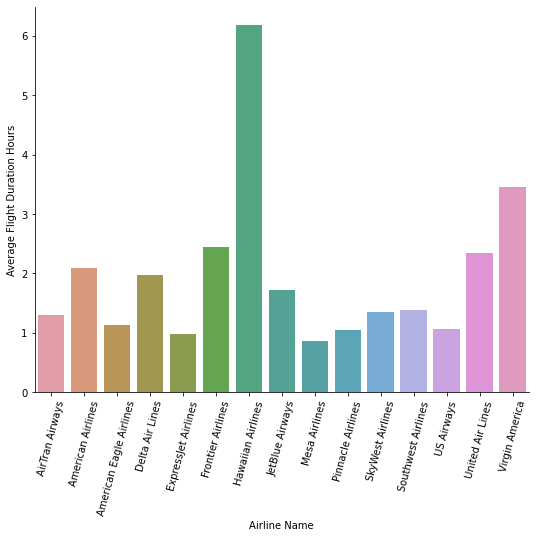

In [839]:
# Creating a graph to show the average duration of a flight by company
g = sns.catplot(x="Airline Name", y="Average Flight Duration Hours",
                data=flights_duration, saturation=.6,
                kind="bar", aspect=.7)
(g.set_axis_labels("Airline Name", "Average Flight Duration Hours")
  .set_xticklabels(["AirTran Airways", "American Airlines", "American Eagle Airlines",
                    "Delta Air Lines","ExpressJet Airlines","Frontier Airlines","Hawaiian Airlines",
                    "JetBlue Airways","Mesa Airlines","Pinnacle Airlines","SkyWest Airlines","Southwest Airlines",
                    "US Airways","United Air Lines","Virgin America"], rotation=75)
  .set_titles("{col_name}"))
g.fig.set_size_inches(13,6)

In [996]:
delays_amount_airport = flights_total[['Airline Name','Cancelled','Carrier Delay','Weather Delay','Airport Authority Delay','Security Delay','Late Aircraft Delay']]

In [997]:
delays_amount_airport

,Airline Name,Cancelled,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay
0,Delta Air Lines Inc.: DL,0,NaN,NaN,NaN,NaN,NaN
1,Delta Air Lines Inc.: DL,1,NaN,NaN,NaN,NaN,NaN
2,Delta Air Lines Inc.: DL,1,NaN,NaN,NaN,NaN,NaN
3,Delta Air Lines Inc.: DL,0,NaN,NaN,NaN,NaN,NaN
4,Delta Air Lines Inc.: DL,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
48813,SkyWest Airlines Inc.: OO,0,NaN,NaN,NaN,NaN,NaN
48814,SkyWest Airlines Inc.: OO,0,NaN,NaN,NaN,NaN,NaN
48815,SkyWest Airlines Inc.: OO,0,0.0,0.0,0.0,0.0,25.0
48816,SkyWest Airlines Inc.: OO,0,42.0,0.0,0.0,0.0,0.0


In [998]:
delays_amount_airport = delays_amount_airport.groupby('Airline Name').agg({'Cancelled':'sum',
                                                          'Carrier Delay':'mean','Weather Delay':'mean',
                                                          'Airport Authority Delay':'mean','Security Delay':'mean',
                                                          'Late Aircraft Delay':'mean'})
delays_amount_airport

,Cancelled,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay
Airline Name,,,,,,
AirTran Airways Corporati,24,6.830556,0.408333,17.750000,0.000000,38.869444
American Airlines Inc.: A,77,17.305682,3.255682,20.350000,0.014773,22.242045
American Eagle Airlines I,239,15.184031,5.277507,21.997079,0.000000,22.667965
Delta Air Lines Inc.: DL,117,18.940655,4.997954,19.789222,0.000000,18.843793
ExpressJet Airlines Inc.:,220,17.189355,1.146366,15.917093,0.005118,31.505629
Frontier Airlines Inc.: F,0,6.209302,0.000000,36.139535,0.000000,25.139535
Hawaiian Airlines Inc.: H,0,16.333333,5.111111,0.000000,0.000000,13.666667
JetBlue Airways: B6,47,19.065145,1.185131,15.455650,0.192492,25.140228
Mesa Airlines Inc.: YV,25,20.361905,5.123810,7.114286,0.000000,34.714286


In [999]:
delays_amount_airport = pd.concat([delays_amount_airport,pd.DataFrame(delays_amount_airport.mean(axis=0),columns=['Grand Total']).T])
delays_amount_airport = pd.concat([delays_amount_airport,pd.DataFrame(delays_amount_airport.mean(axis=1),columns=['Total'])],axis=1)

In [1000]:
# Function to format the cell better
def do(*args):
    formattedList = [float("{:.2f}".format(num)) for num in args]
    _result =(sum(formattedList))
    result = round(_result,2)
    return result

In [1001]:
delays_amount_airport['Cancelled'] = delays_amount_airport['Cancelled'].apply(do)
delays_amount_airport['Carrier Delay'] = delays_amount_airport['Carrier Delay'].apply(do)
delays_amount_airport['Weather Delay'] = delays_amount_airport['Weather Delay'].apply(do)
delays_amount_airport['Airport Authority Delay'] = delays_amount_airport['Airport Authority Delay'].apply(do)
delays_amount_airport['Security Delay'] = delays_amount_airport['Security Delay'].apply(do)
delays_amount_airport['Late Aircraft Delay'] = delays_amount_airport['Late Aircraft Delay'].apply(do)
delays_amount_airport['Total'] = delays_amount_airport['Total'].apply(do)

In [1002]:
delays_amount_airport

,Cancelled,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay,Total
AirTran Airways Corporati,24.00,6.83,0.41,17.75,0.00,38.87,14.64
American Airlines Inc.: A,77.00,17.31,3.26,20.35,0.01,22.24,23.36
American Eagle Airlines I,239.00,15.18,5.28,22.00,0.00,22.67,50.69
Delta Air Lines Inc.: DL,117.00,18.94,5.00,19.79,0.00,18.84,29.93
ExpressJet Airlines Inc.:,220.00,17.19,1.15,15.92,0.01,31.51,47.63
Frontier Airlines Inc.: F,0.00,6.21,0.00,36.14,0.00,25.14,11.25
Hawaiian Airlines Inc.: H,0.00,16.33,5.11,0.00,0.00,13.67,5.85
JetBlue Airways: B6,47.00,19.07,1.19,15.46,0.19,25.14,18.01
Mesa Airlines Inc.: YV,25.00,20.36,5.12,7.11,0.00,34.71,15.39
Pinnacle Airlines Inc.: 9,236.00,6.27,0.67,48.02,0.06,6.64,49.61


In [1096]:
# Creating columns for early or late arrivals and departures
flights_total['Early Arrival'] = flights_total['Scheduled Arrival Time'] - flights_total['Actual Arrival Time']
flights_total['Late Arrival'] = flights_total['Scheduled Arrival Time'] - flights_total['Actual Arrival Time']
flights_total['Early Departure'] = flights_total['Scheduled Departure time'] - flights_total['Actual Departure Time']
flights_total['Late Departure'] = flights_total['Scheduled Departure time'] - flights_total['Actual Departure Time']

In [1097]:
# Changing them to string to make it easier to manipulate them
flights_total['Early Arrival'] = flights_total['Early Arrival'].astype(str)
flights_total['Late Arrival'] = flights_total['Late Arrival'].astype(str)
flights_total['Early Departure'] = flights_total['Early Departure'].astype(str)
flights_total['Late Departure'] = flights_total['Late Departure'].astype(str)

In [1098]:
# Function to set early flights indication
def early(string):
    output = string
    if output.startswith('0 days') == True:
        output = 1
    else:
        output = np.nan
    return output

In [1099]:
# Function to set late flights indication
def late(string):
    output = string
    if output.startswith('-1 days') == True: 
        output = 1
    else:
        output = np.nan
    return output

In [1100]:
# applying the functions
flights_total['Early Arrival'] = flights_total['Early Arrival'].apply(early)
flights_total['Late Arrival'] = flights_total['Late Arrival'].apply(late)
flights_total['Early Departure'] = flights_total['Early Departure'].apply(earlyd)
flights_total['Late Departure'] = flights_total['Late Departure'].apply(lated)

In [1117]:
# Creating columns for on time departures and arrivals
flights_total['On Time Departure'] = flights_total['Scheduled Departure time'] - flights_total['Actual Departure Time']
flights_total['On Time Arrival'] = flights_total['Scheduled Departure time'] - flights_total['Actual Departure Time']

In [1118]:
# Changing them to string to make it easier to manipulate them
flights_total['On Time Departure'] = flights_total['On Time Departure'].astype(str)
flights_total['On Time Arrival'] = flights_total['On Time Arrival'].astype(str)

In [1119]:
# Function to set early flights indication
def ota(string):
    output = string
    if output == '0 days 00:00:00':
        output = 1
    else:
        output = np.nan
    return output

In [1120]:
# Function to set late flights indication
def otd(string):
    output = string
    if output == '0 days 00:00:00': 
        output = 1
    else:
        output = np.nan
    return output

In [1121]:
# applying the functions
flights_total['On Time Departure'] = flights_total['On Time Departure'].apply(ota)
flights_total['On Time Arrival'] = flights_total['On Time Arrival'].apply(otd)

In [1226]:
flights_total2 = flights_total

In [1228]:
# Adding a flight number to use as a counter
flights_total['Total Flights'] = np.arange(len(flights_total2))+1

In [1154]:
# creating a table for delays in airlines
delay_da = flights_total[['Airline Name','Early Arrival','Late Arrival','Early Departure','Late Departure','On Time Departure','On Time Arrival','Total Flights']]

In [1155]:
# grouping and aggregating for graph
delay_da = delay_da.groupby('Airline Name').agg({'Early Arrival':'count','Late Arrival':'count','Early Departure':'count',
                                                 'Late Departure':'count','On Time Departure':'count','On Time Arrival':'count',
                                                 'Total Flights':'count'})
delay_da

,Early Arrival,Late Arrival,Early Departure,Late Departure,On Time Departure,On Time Arrival,Total Flights
Airline Name,,,,,,,
AirTran Airways Corporati,740,680,853,575,59,59,1451
American Airlines Inc.: A,3162,1682,3187,1719,274,274,4983
American Eagle Airlines I,2843,1772,3273,1369,226,226,4874
Delta Air Lines Inc.: DL,5223,3026,5682,2627,545,545,8424
ExpressJet Airlines Inc.:,1990,1480,2041,1437,109,109,3690
Frontier Airlines Inc.: F,52,62,68,46,9,9,114
Hawaiian Airlines Inc.: H,24,31,37,25,3,3,62
JetBlue Airways: B6,4841,4512,5632,4137,476,476,9811
Mesa Airlines Inc.: YV,378,177,376,180,27,27,580


In [1156]:
# Changing the values to an average
delay_da['Early Arrival'] = (delay_da['Early Arrival']/delay_da['Total Flights'])*100
delay_da['Late Arrival'] = (delay_da['Late Arrival']/delay_da['Total Flights'])*100
delay_da['Early Departure'] = (delay_da['Early Departure']/delay_da['Total Flights'])*100
delay_da['Late Departure'] = (delay_da['Late Departure']/delay_da['Total Flights'])*100
delay_da['On Time Departure'] = (delay_da['On Time Departure']/delay_da['Total Flights'])*100
delay_da['On Time Arrival'] = (delay_da['On Time Arrival']/delay_da['Total Flights'])*100

In [1157]:
# Applying a function to shorten the number's format
delay_da['Early Arrival'] = delay_da['Early Arrival'].apply(do)
delay_da['Late Arrival'] = delay_da['Late Arrival'].apply(do)
delay_da['Early Departure'] = delay_da['Early Departure'].apply(do)
delay_da['Late Departure'] = delay_da['Late Departure'].apply(do)
delay_da['On Time Departure'] = delay_da['On Time Departure'].apply(do)
delay_da['On Time Arrival'] = delay_da['On Time Arrival'].apply(do)

In [1159]:
# adding % symbol to reflect better
delay_da['Early Arrival'] = delay_da['Early Arrival'].astype(str)
delay_da['Early Arrival'] = delay_da['Early Arrival']+'%'
delay_da['Late Arrival'] = delay_da['Late Arrival'].astype(str)
delay_da['Late Arrival'] = delay_da['Late Arrival']+'%'
delay_da['Early Departure'] = delay_da['Early Departure'].astype(str)
delay_da['Early Departure'] = delay_da['Early Departure']+'%'
delay_da['Late Departure'] = delay_da['Late Departure'].astype(str)
delay_da['Late Departure'] = delay_da['Late Departure']+'%'
delay_da['On Time Departure'] = delay_da['On Time Departure'].astype(str)
delay_da['On Time Departure'] = delay_da['On Time Departure']+'%'
delay_da['On Time Arrival'] = delay_da['On Time Arrival'].astype(str)
delay_da['On Time Arrival'] = delay_da['On Time Arrival']+'%'

In [1160]:
delay_da

,Early Arrival,Late Arrival,Early Departure,Late Departure,On Time Departure,On Time Arrival,Total Flights
Airline Name,,,,,,,
AirTran Airways Corporati,51.0%,46.86%,58.79%,39.63%,4.07%,4.07%,1451
American Airlines Inc.: A,63.46%,33.75%,63.96%,34.5%,5.5%,5.5%,4983
American Eagle Airlines I,58.33%,36.36%,67.15%,28.09%,4.64%,4.64%,4874
Delta Air Lines Inc.: DL,62.0%,35.92%,67.45%,31.18%,6.47%,6.47%,8424
ExpressJet Airlines Inc.:,53.93%,40.11%,55.31%,38.94%,2.95%,2.95%,3690
Frontier Airlines Inc.: F,45.61%,54.39%,59.65%,40.35%,7.89%,7.89%,114
Hawaiian Airlines Inc.: H,38.71%,50.0%,59.68%,40.32%,4.84%,4.84%,62
JetBlue Airways: B6,49.34%,45.99%,57.4%,42.17%,4.85%,4.85%,9811
Mesa Airlines Inc.: YV,65.17%,30.52%,64.83%,31.03%,4.66%,4.66%,580


In [1161]:
delay_dag = flights_total[['Airline Name','Early Arrival','Late Arrival','Early Departure','Late Departure','On Time Departure','On Time Arrival','Total Flights']]

In [1162]:
delay_dag = delay_dag.groupby('Airline Name').agg({'Early Arrival':'count','Late Arrival':'count','Early Departure':'count',
                                                 'Late Departure':'count','On Time Departure':'count','On Time Arrival':'count',
                                                 'Total Flights':'count'})
delay_dag

,Early Arrival,Late Arrival,Early Departure,Late Departure,On Time Departure,On Time Arrival,Total Flights
Airline Name,,,,,,,
AirTran Airways Corporati,740,680,853,575,59,59,1451
American Airlines Inc.: A,3162,1682,3187,1719,274,274,4983
American Eagle Airlines I,2843,1772,3273,1369,226,226,4874
Delta Air Lines Inc.: DL,5223,3026,5682,2627,545,545,8424
ExpressJet Airlines Inc.:,1990,1480,2041,1437,109,109,3690
Frontier Airlines Inc.: F,52,62,68,46,9,9,114
Hawaiian Airlines Inc.: H,24,31,37,25,3,3,62
JetBlue Airways: B6,4841,4512,5632,4137,476,476,9811
Mesa Airlines Inc.: YV,378,177,376,180,27,27,580


In [1164]:
delay_dag['Early Arrival'] = (delay_dag['Early Arrival']/delay_da['Total Flights'])*100
delay_dag['Late Arrival'] = (delay_dag['Late Arrival']/delay_da['Total Flights'])*100
delay_dag['Early Departure'] = (delay_dag['Early Departure']/delay_da['Total Flights'])*100
delay_dag['Late Departure'] = (delay_dag['Late Departure']/delay_da['Total Flights'])*100
delay_dag['On Time Departure'] = (delay_dag['On Time Departure']/delay_da['Total Flights'])*100
delay_dag['On Time Arrival'] = (delay_dag['On Time Arrival']/delay_da['Total Flights'])*100

In [1166]:
delay_dag.drop('Total Flights', axis = 1, inplace=True)

In [1165]:
delay_dag['Early Arrival'] = delay_dag['Early Arrival'].apply(do)
delay_dag['Late Arrival'] = delay_dag['Late Arrival'].apply(do)
delay_dag['Early Departure'] = delay_dag['Early Departure'].apply(do)
delay_dag['Late Departure'] = delay_dag['Late Departure'].apply(do)
delay_dag['On Time Departure'] = delay_dag['On Time Departure'].apply(do)
delay_dag['On Time Arrival'] = delay_dag['On Time Arrival'].apply(do)
delay_dag

,Early Arrival,Late Arrival,Early Departure,Late Departure,On Time Departure,On Time Arrival,Total Flights
Airline Name,,,,,,,
AirTran Airways Corporati,51.00,46.86,58.79,39.63,4.07,4.07,1451
American Airlines Inc.: A,63.46,33.75,63.96,34.50,5.50,5.50,4983
American Eagle Airlines I,58.33,36.36,67.15,28.09,4.64,4.64,4874
Delta Air Lines Inc.: DL,62.00,35.92,67.45,31.18,6.47,6.47,8424
ExpressJet Airlines Inc.:,53.93,40.11,55.31,38.94,2.95,2.95,3690
Frontier Airlines Inc.: F,45.61,54.39,59.65,40.35,7.89,7.89,114
Hawaiian Airlines Inc.: H,38.71,50.00,59.68,40.32,4.84,4.84,62
JetBlue Airways: B6,49.34,45.99,57.40,42.17,4.85,4.85,9811
Mesa Airlines Inc.: YV,65.17,30.52,64.83,31.03,4.66,4.66,580


In [1167]:
delay_dag

,Early Arrival,Late Arrival,Early Departure,Late Departure,On Time Departure,On Time Arrival
Airline Name,,,,,,
AirTran Airways Corporati,51.00,46.86,58.79,39.63,4.07,4.07
American Airlines Inc.: A,63.46,33.75,63.96,34.50,5.50,5.50
American Eagle Airlines I,58.33,36.36,67.15,28.09,4.64,4.64
Delta Air Lines Inc.: DL,62.00,35.92,67.45,31.18,6.47,6.47
ExpressJet Airlines Inc.:,53.93,40.11,55.31,38.94,2.95,2.95
Frontier Airlines Inc.: F,45.61,54.39,59.65,40.35,7.89,7.89
Hawaiian Airlines Inc.: H,38.71,50.00,59.68,40.32,4.84,4.84
JetBlue Airways: B6,49.34,45.99,57.40,42.17,4.85,4.85
Mesa Airlines Inc.: YV,65.17,30.52,64.83,31.03,4.66,4.66


In [1211]:
flights_total['Week Day'] = flights_total['Date'].dt.day_name()

In [1231]:
delay_day = flights_total.groupby('Week Day').agg({'Carrier Delay':'mean','Weather Delay':'mean','Airport Authority Delay':'mean',
                                                 'Security Delay':'mean','Late Aircraft Delay':'mean'})
delay_day

,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay
Week Day,,,,,
1,19.075612,0.676798,15.787250,0.037064,20.676056
2,14.672384,5.006289,24.798742,0.033734,20.242996
3,14.364662,1.260652,25.643484,0.044486,24.218045
4,18.063241,0.559289,13.894269,0.014822,17.929842
5,14.567994,1.201352,17.912847,0.184823,17.776860
6,14.422278,5.292658,24.169620,0.067848,32.232911
7,15.551913,0.997951,15.885929,0.066940,18.614754


In [1232]:
delay_day = pd.concat([delay_day,pd.DataFrame(delay_day.mean(axis=0),columns=['Total']).T])
delay_day = pd.concat([delay_day,pd.DataFrame(delay_day.mean(axis=1),columns=['Total'])],axis=1)

In [1222]:
delay_day

,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay,Total
1,19.075612,0.676798,15.787250,0.037064,20.676056,11.250556
2,14.672384,5.006289,24.798742,0.033734,20.242996,12.950829
3,14.364662,1.260652,25.643484,0.044486,24.218045,13.106266
4,18.063241,0.559289,13.894269,0.014822,17.929842,10.092292
5,14.567994,1.201352,17.912847,0.184823,17.776860,10.328775
6,14.422278,5.292658,24.169620,0.067848,32.232911,15.237063
7,15.551913,0.997951,15.885929,0.066940,18.614754,10.223497
Total,15.816869,2.142141,19.727449,0.064245,21.670209,11.884183


In [1251]:
delay_airport = flights_total[['Origin Airport Name','Carrier Delay','Weather Delay','Airport Authority Delay','Security Delay','Late Aircraft Delay','Total Flights']]

In [1258]:
delay_airportg = delay_airport.groupby('Origin Airport Name').agg({'Carrier Delay':'mean','Weather Delay':'mean','Airport Authority Delay':'mean',
                                                 'Security Delay':'mean','Late Aircraft Delay':'mean','Total Flights':'count'}).sort_values('Total Flights', ascending=False).head(10)
delay_airportg

,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay,Total Flights
Origin Airport Name,,,,,,
"New York, NY: John F. Kennedy International",19.184223,3.047526,20.887800,0.206761,15.253307,9697
"New York, NY: LaGuardia",14.104096,3.750853,13.365757,0.015358,30.242321,8717
"Buffalo, NY: Buffalo Niagara International",11.102564,1.705128,19.980769,0.000000,26.004274,2118
"Atlanta, GA: Hartsfield-Jackson Atlanta International",18.572700,2.172107,21.519288,0.000000,17.216617,1818
"Chicago, IL: Chicago O'Hare International",12.370741,4.042084,22.855711,0.000000,18.725451,1716
"Orlando, FL: Orlando International",20.505556,1.050000,12.963889,0.088889,31.302778,1553
"Detroit, MI: Detroit Metro Wayne County",11.491103,0.690391,33.142349,0.000000,10.814947,1373
"Fort Lauderdale, FL: Fort Lauderdale-Hollywood International",16.033241,0.055402,19.423823,0.038781,25.515235,1140
"Albany, NY: Albany International",16.363636,3.042781,17.860963,0.026738,23.021390,1028


In [1248]:
delay_airport.drop('Total', axis = 0, inplace=True)

In [1259]:
delay_airportg['Carrier Delay'] = delay_airportg['Carrier Delay'].apply(do)
delay_airportg['Weather Delay'] = delay_airportg['Weather Delay'].apply(do)
delay_airportg['Airport Authority Delay'] = delay_airportg['Airport Authority Delay'].apply(do)
delay_airportg['Security Delay'] = delay_airportg['Security Delay'].apply(do)
delay_airportg['Late Aircraft Delay'] = delay_airportg['Late Aircraft Delay'].apply(do)
delay_airportg

,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay,Total Flights
Origin Airport Name,,,,,,
"New York, NY: John F. Kennedy International",19.18,3.05,20.89,0.21,15.25,9697
"New York, NY: LaGuardia",14.10,3.75,13.37,0.02,30.24,8717
"Buffalo, NY: Buffalo Niagara International",11.10,1.71,19.98,0.00,26.00,2118
"Atlanta, GA: Hartsfield-Jackson Atlanta International",18.57,2.17,21.52,0.00,17.22,1818
"Chicago, IL: Chicago O'Hare International",12.37,4.04,22.86,0.00,18.73,1716
"Orlando, FL: Orlando International",20.51,1.05,12.96,0.09,31.30,1553
"Detroit, MI: Detroit Metro Wayne County",11.49,0.69,33.14,0.00,10.81,1373
"Fort Lauderdale, FL: Fort Lauderdale-Hollywood International",16.03,0.06,19.42,0.04,25.52,1140
"Albany, NY: Albany International",16.36,3.04,17.86,0.03,23.02,1028


In [1269]:
delay_airportg = delay_airportg.reset_index()
delay_airportg

,Origin Airport Name,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay,Total Flights
0,"New York, NY: John F. Kennedy International",19.18,3.05,20.89,0.21,15.25,9697
1,"New York, NY: LaGuardia",14.10,3.75,13.37,0.02,30.24,8717
2,"Buffalo, NY: Buffalo Niagara International",11.10,1.71,19.98,0.00,26.00,2118
3,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",18.57,2.17,21.52,0.00,17.22,1818
4,"Chicago, IL: Chicago O'Hare International",12.37,4.04,22.86,0.00,18.73,1716
5,"Orlando, FL: Orlando International",20.51,1.05,12.96,0.09,31.30,1553
6,"Detroit, MI: Detroit Metro Wayne County",11.49,0.69,33.14,0.00,10.81,1373
7,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",16.03,0.06,19.42,0.04,25.52,1140
8,"Albany, NY: Albany International",16.36,3.04,17.86,0.03,23.02,1028
9,"Charlotte, NC: Charlotte Douglas International",18.14,1.78,19.86,0.09,12.38,976


In [1280]:
# A function to rename New York airports to a shorter name
def airport_names(str):
    if str == 'New York, NY: John F. Kennedy International':
        output = 'New York - JFK'
        return output
    elif str == 'New York, NY: LaGuardia':
        output = 'New York - LaGuardia'
        return output
    elif str == 'Buffalo, NY: Buffalo Niagara International':
        output = 'New York - Buffalo'
        return output
    elif str == 'Binghamton, NY: Greater Binghamton/Edwin A. Link Field':
        output = 'New York - Binghamton'
        return output
    elif str == "Elmira/Corning, NY: Elmira/Corning Regional":
        output = "New York - Elmira/Corning"
        return output
    elif str == 'Islip, NY: Long Island MacArthur':
        output = 'New York - Long Island'
        return output
    elif str == 'Ithaca/Cortland, NY: Ithaca Tompkins Regional':
        output = 'New York - Ithaca'
        return output
    elif str == 'Newburgh/Poughkeepsie, NY: Stewart International':
        output = 'New York - Newburgh Stewart'
        return output
    elif str == 'Albany, NY: Albany International':
        output = 'New York - Albany'
        return output
    elif str == 'Rochester, NY: Greater Rochester International':
        output = 'New York - Rochester'
        return output
    elif str == 'Syracuse, NY: Syracuse Hancock International':
        output = 'New York - Syracuse'
        return output
    elif str == 'Watertown, NY: Watertown International':
        output = 'New York - Watertown'
        return output
    elif str == 'White Plains, NY: Westchester County':
        output = 'New York - White Plains'
        return output

In [1282]:
flights_total['Origin Airport Name'] = flights_total['Origin Airport Name'].apply(airport_names)
flights_total['Destination Airport Name'] = flights_total['Destination Airport Name'].apply(airport_names)

In [1270]:
delay_airportg['Origin Airport Name'] = delay_airportg['Origin Airport Name'].apply(airport_names)

In [1271]:
delay_airportg

,Origin Airport Name,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay,Total Flights
0,New York - JFK,19.18,3.05,20.89,0.21,15.25,9697
1,New York - LaGuardia,14.10,3.75,13.37,0.02,30.24,8717
2,New York - Buffalo,11.10,1.71,19.98,0.00,26.00,2118
3,Georgia - Atlanta HJ,18.57,2.17,21.52,0.00,17.22,1818
4,illinois - Chicaco O'Hare,12.37,4.04,22.86,0.00,18.73,1716
5,Florida - Orlando,20.51,1.05,12.96,0.09,31.30,1553
6,Michigan - Detroit,11.49,0.69,33.14,0.00,10.81,1373
7,Florida - Fort LH,16.03,0.06,19.42,0.04,25.52,1140
8,New Yrok - Albany,16.36,3.04,17.86,0.03,23.02,1028
9,North Carolina - CD,18.14,1.78,19.86,0.09,12.38,976


In [1244]:
# adding totals
delay_airport = pd.concat([delay_airport,pd.DataFrame(delay_airport.mean(axis=0),columns=['Total']).T])
delay_airport = pd.concat([delay_airport,pd.DataFrame(delay_airport.mean(axis=1),columns=['Total'])],axis=1)
delay_airport

,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay,Flight Number,Total
"New York, NY: John F. Kennedy International",19.184223,3.047526,20.887800,0.206761,15.253307,9697.0,1625.929936
"New York, NY: LaGuardia",14.104096,3.750853,13.365757,0.015358,30.242321,8717.0,1463.079731
"Buffalo, NY: Buffalo Niagara International",11.102564,1.705128,19.980769,0.000000,26.004274,2118.0,362.798789
"Atlanta, GA: Hartsfield-Jackson Atlanta International",18.572700,2.172107,21.519288,0.000000,17.216617,1818.0,312.913452
"Chicago, IL: Chicago O'Hare International",12.370741,4.042084,22.855711,0.000000,18.725451,1716.0,295.665665
"Orlando, FL: Orlando International",20.505556,1.050000,12.963889,0.088889,31.302778,1553.0,269.818519
"Detroit, MI: Detroit Metro Wayne County",11.491103,0.690391,33.142349,0.000000,10.814947,1373.0,238.189798
"Fort Lauderdale, FL: Fort Lauderdale-Hollywood International",16.033241,0.055402,19.423823,0.038781,25.515235,1140.0,200.177747
"Albany, NY: Albany International",16.363636,3.042781,17.860963,0.026738,23.021390,1028.0,181.385918
"Charlotte, NC: Charlotte Douglas International",18.136752,1.777778,19.863248,0.089744,12.376068,976.0,171.373932


In [1218]:
def days_num(str):
    if str == 'Sunday':
        output = '1'
    elif str == 'Monday':
        output = '2'
    elif str == 'Tuesday':
        output = '3'
    elif str == 'Wednesday':
        output = '4'
    elif str == 'Thursday':
        output = '5'
    elif str == 'Friday':
        output = '6'
    elif str == 'Saturday':
        output = '7'
    return output

In [1219]:
flights_total['Week Day'] = flights_total['Week Day'].apply(days_num)

In [1294]:
flights_total.groupby('Week Day').agg({'Date':'count'})

,Date
Week Day,
1,7622
2,6590
3,6515
4,6549
5,6594
6,8210
7,6738


In [1229]:
flights_total.head()

,Year,Date,day,Airline ID,Origin Airport ID,Destination Airport ID,Scheduled Departure time,Actual Departure Time,Departure delayed,Scheduled Arrival Time,Actual Arrival Time,Arrival delayed,Cancelled,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay,Origin Airport Name,Destination Airport Name,Airline Name,Flight Duration,Flight Duration Seconds,Early Arrival,Late Arrival,Early Departure,Late Departure,On Time Departure,On Time Arrival,Total Flights,Week Day,Flight Number
0,2013,2013-03-02,2,19790,11292,12478,1900-01-01 00:50:00,1900-01-01 00:39:00,1.0,1900-01-01 06:32:00,1900-01-01 06:26:00,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines,0 days 05:47:00,20820.0,1.0,NaN,1.0,NaN,NaN,NaN,1,7,1
1,2013,2013-03-19,19,19790,11292,12478,1900-01-01 08:45:00,NaT,NaN,1900-01-01 14:29:00,NaT,NaN,1,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2
2,2013,2013-03-25,25,19790,11292,12478,1900-01-01 08:45:00,NaT,NaN,1900-01-01 14:29:00,NaT,NaN,1,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,3
3,2013,2013-03-06,6,19790,11292,12478,1900-01-01 08:45:00,1900-01-01 08:39:00,1.0,1900-01-01 14:29:00,1900-01-01 14:32:00,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines,0 days 05:53:00,21180.0,NaN,1.0,1.0,NaN,NaN,NaN,4,4,4
4,2013,2013-03-29,29,19790,11292,12478,1900-01-01 08:45:00,1900-01-01 08:40:00,1.0,1900-01-01 14:29:00,1900-01-01 14:09:00,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines,0 days 05:29:00,19740.0,1.0,NaN,1.0,NaN,NaN,NaN,5,6,5


In [1295]:
flights_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48818 entries, 0 to 48817
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   Year                      48818 non-null  int64          
 1   Date                      48818 non-null  datetime64[ns] 
 2   day                       48818 non-null  int64          
 3   Airline ID                48818 non-null  int64          
 4   Origin Airport ID         48818 non-null  int64          
 5   Destination Airport ID    48818 non-null  int64          
 6   Scheduled Departure time  48818 non-null  datetime64[ns] 
 7   Actual Departure Time     47638 non-null  datetime64[ns] 
 8   Departure delayed         47598 non-null  float64        
 9   Scheduled Arrival Time    48818 non-null  datetime64[ns] 
 10  Actual Arrival Time       47572 non-null  datetime64[ns] 
 11  Arrival delayed           47598 non-null  float64        
 12  Canc

In [ ]:
flights_total.to_csv('flights_total1.csv', index=False, sep=',', encoding='utf-8')

In [1072]:
flights_total['Departure delayed '].value_counts()

1.0    45063
0.0     2535
Name: Departure delayed , dtype: int64

In [1063]:
flights_total[flights_total['Cancelled'] == 1].isna().sum()

Year                           0
Date                           0
day                            0
Airline ID                     0
Origin Airport ID              0
Destination Airport ID         0
Scheduled Departure time       0
Actual Departure Time       1180
Departure delayed           1220
Scheduled Arrival Time         0
Actual Arrival Time         1220
Arrival delayed             1220
Cancelled                      0
Carrier Delay               1220
Weather Delay               1220
Airport Authority Delay     1220
Security Delay              1220
Late Aircraft Delay         1220
Origin Airport Name            0
Destination Airport Name       0
Airline Name                   0
Flight Duration             1220
Flight Duration Seconds     1220
dtype: int64

<AxesSubplot:>

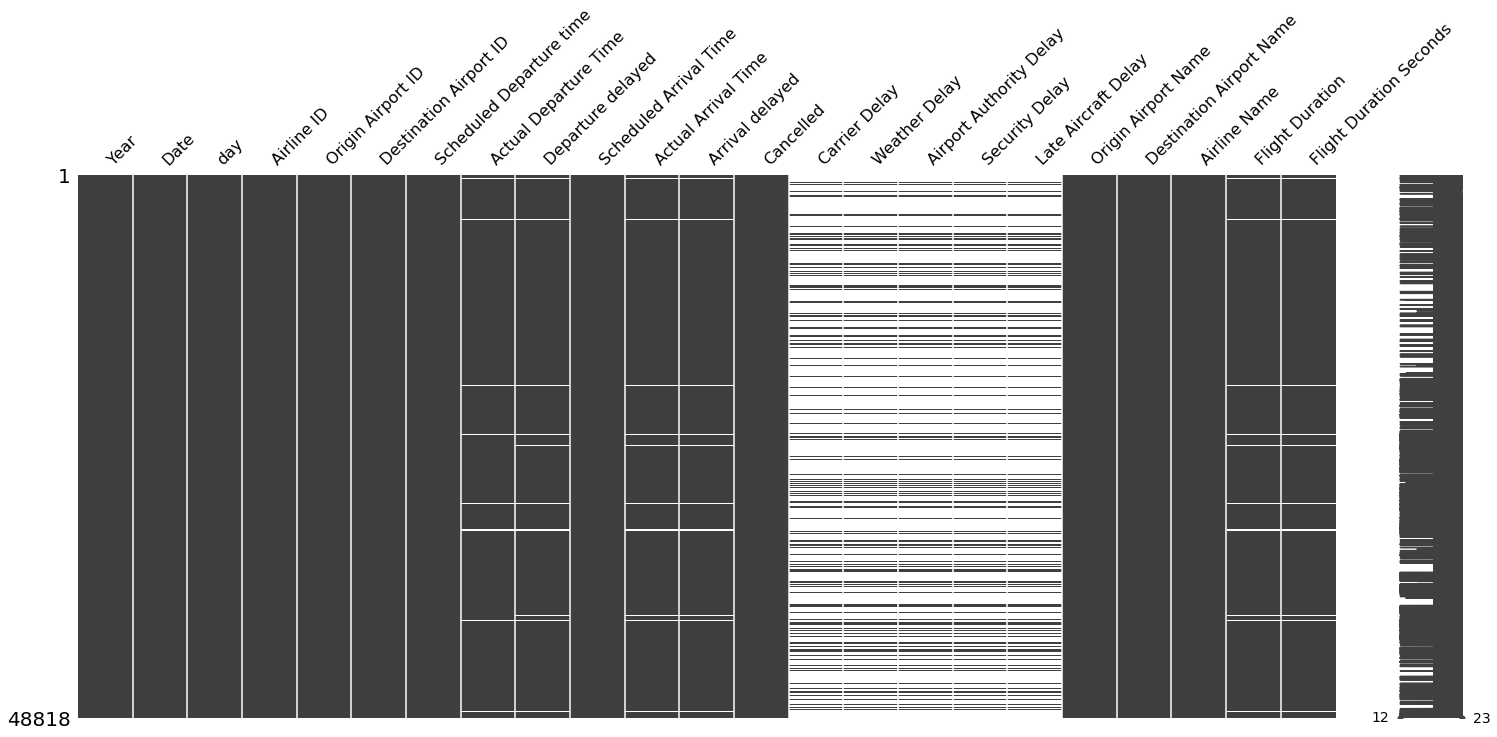

In [1062]:
%matplotlib inline
import missingno as msno
msno.matrix(flights_total)

In [1074]:
flights_total.head()

,Year,Date,day,Airline ID,Origin Airport ID,Destination Airport ID,Scheduled Departure time,Actual Departure Time,Departure delayed,Scheduled Arrival Time,Actual Arrival Time,Arrival delayed,Cancelled,Carrier Delay,Weather Delay,Airport Authority Delay,Security Delay,Late Aircraft Delay,Origin Airport Name,Destination Airport Name,Airline Name,Flight Duration,Flight Duration Seconds
0,2013,2013-03-02,2,19790,11292,12478,1900-01-01 00:50:00,1900-01-01 00:39:00,1.0,1900-01-01 06:32:00,1900-01-01 06:26:00,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines Inc.: DL,0 days 05:47:00,20820.0
1,2013,2013-03-19,19,19790,11292,12478,1900-01-01 08:45:00,NaT,NaN,1900-01-01 14:29:00,NaT,NaN,1,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines Inc.: DL,NaT,NaN
2,2013,2013-03-25,25,19790,11292,12478,1900-01-01 08:45:00,NaT,NaN,1900-01-01 14:29:00,NaT,NaN,1,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines Inc.: DL,NaT,NaN
3,2013,2013-03-06,6,19790,11292,12478,1900-01-01 08:45:00,1900-01-01 08:39:00,1.0,1900-01-01 14:29:00,1900-01-01 14:32:00,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines Inc.: DL,0 days 05:53:00,21180.0
4,2013,2013-03-29,29,19790,11292,12478,1900-01-01 08:45:00,1900-01-01 08:40:00,1.0,1900-01-01 14:29:00,1900-01-01 14:09:00,1.0,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","New York, NY: John F. Kennedy International",Delta Air Lines Inc.: DL,0 days 05:29:00,19740.0
